<a href="https://colab.research.google.com/github/PX2145-2025/week-2-b-max-cook/blob/main/Copy_of_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedback for week 1 and other and hints

We are working with [Jupyter notebooks](https://jupyter.org/). You can either run those in the [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) environment, or on your own computer with [Anaconda3](https://www.anaconda.com/distribution/#download-section).

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Graphs without labels (or units when appropriate) are not worth any point.
4. If you are using `loadtxt()` to read in from a file where the numbers are separated by commas, you need to use the keyword `delimiter=','`.
5. If you are asked to plot a function (for example $y = x^2$ in question 2 last week, or the 2D function of question 3) you will need to think for yourself the best way to do this - deciding the number of points and the range of values etc.
6. Always explore the options of Python functions using the in-built help or refer to https://docs.scipy.org/ and https://www.python.org/doc/.

For this week we will need the following imports:

In [25]:
from numpy import array,sqrt,pi,sin, zeros_like, linspace

# Introduction

In this worksheet we’ll introduce Python functions. Functions are important in any programming language since they enable code to be simply re-used in a program (and other programs). They also help break up complex problems into simpler pieces and therefore make the code simpler and clearer.
Functions are most easily understood by example:
## Simple functions
Run the following code:

In [26]:
def cube(x):
    """
    Return the cube of x
    >>> cube(3)
    27
    """
    return x * x * x

x = 3.1
print('Cube of', x, 'is', cube(x))
'''
Of course, we don't have to use the same variable name 'x'. This is
a 'dummy variable' in the function.
'''
y = 3.1
print('Cube of', y, 'is', cube(y))

print('Cube of', 1.3, 'is', cube(1.3))

Cube of 3.1 is 29.791000000000004
Cube of 3.1 is 29.791000000000004
Cube of 1.3 is 2.1970000000000005


The keyword `def` marks the start of the definition of a function. This is followed by the name of the function and any parameters that are to be passed into the function. The keyword `return` is used if the function needs to return parameters. Not all functions will need to do this - they might just perform a series of actions. For example:

In [27]:
# Define a simple function ...
def print_cube(x):
    """
    Prints the cube of x
    >>> print_cube(3)
    Cube of 3 is 27
    """
    print ('Cube of', x, 'is', x * x * x)

print_cube(3)

Cube of 3 is 27


What do you expect the following code snippet will print out?

In [28]:
# Define a simple function ...
def quad(x):
    """
    Return the fourth power of x
    >>> quad(3)
    81
    """
    x = x**4
    return x

x = 2
print('Original value', x)
quad(x)
print('After function call', x)

Original value 2
After function call 2


**Note**: the functions above have a short string describing what they do, and give an example of how to use them. Writing the function documation that way in `python` has two advanges. First, it will get picked up by built-in help systems, and second it can get run automatically by software that check the health of the code. We are using such a software, [doctest](https://docs.python.org/3/library/doctest.html#module-doctest), in this classroom setup. So in this latest example, `doctest` tries to run `quad(3)` and checks if the answer is indeed `81`. There are such tests included in the exercises. Don't remove them, they are here to help you iterate over the right solution.

Functions can be rather flexible in how they work. For example, we can define a simple function which is a linear function of an input variable x, and it will work for both a simple variable or an array:

In [29]:
# Define a simple function ...
def print_cube(x):
    """
    Prints the cube of x
    >>> print_cube(3)
    Cube of 3 is 27
    """
    print('Cube of', x, 'is', x * x * x)

print_cube(3)

# Define a less simple function ...
def linear(x, m, c):
    '''
    This returns a linear function of a variable x
    '''
    return m*x + c

x = 1.2
y = linear(x, 2, 1)
print(y)

Cube of 3 is 27
3.4


In [30]:
# Create a data array ...
x = array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ])
y = linear(x, 2, 1)
print(y)

[ 1.  3.  5.  7.  9. 11. 13. 15.]


## More about functions
Sometimes, there can be lots of variables that remain the same when calling a function. If that’s the case you can simplify the syntax a bit. For example, let’s write a function to find how long it takes a mass to hit the ground when dropped (from rest) from a height h. The function will look like:

In [31]:
def T(h, g):
    '''
    Returns fall time [s] of a mass released from a height
    h [m] above the Earth's surface. g in ms^-2.
    '''
    return sqrt(2*h/g)

This is called as follows:

In [32]:
height = 1  # metre
print ('Time from', height, 'metre', 'is' , T(height, 9.8),'s')

Time from 1 metre is 0.4517539514526256 s


You *could* program this with a hard-coded value for g, to make the function call simpler:

In [33]:
def T(h):
    '''
    Returns fall time [s] of a mass released from a height
    h [m] above the Earth's surface.
    '''
    g=9.81 # in ms^-2
    return sqrt(2*h/g)

height = 1 # metre
print ('Time from', height, 'metre', 'is' , T(height),'s')

Time from 1 metre is 0.4515236409857309 s


but then of course it wouldn’t work for Mars’ gravity. A better way is

In [34]:
def T(h, g=9.81):
    '''
    Returns fall time [s] of a mass released from a height
    h [m] above a planet's surface. Default g is 9.81 ms^-2
    '''
    return sqrt(2*h/g)

height = 1  # metre
print('Time from', height, 'metre', 'on Earth is' , T(height),'s')
print('Time from', height, 'metre', 'on Mars is' , T(height, g=3.7),'s')

Time from 1 metre on Earth is 0.4515236409857309 s
Time from 1 metre on Mars is 0.7352146220938077 s


In [35]:
for height in [1,2,5,10]:
    print('Time from', height, 'metre', 'on Earth is' , T(height),'s')

Time from 1 metre on Earth is 0.4515236409857309 s
Time from 2 metre on Earth is 0.638550856814101 s
Time from 5 metre on Earth is 1.0096375546923044 s
Time from 10 metre on Earth is 1.4278431229270645 s


You can easily extend this to any number of variables. **IMPORTANT**: remember, documentation is part of the code. You should always add a description of a function, especially its inputs and outputs.
## Formatting - a reminder
You’ll often want to control the number of significant figures that you print out, or use scientific rather than floating point representation of numbers. Remember that you can achieve this in the following ways for example:

In [36]:
# recommended method
print('pi is approximately {0:.3f}.'.format(pi))
# old method you'll see in some code


print('pi is approximately %5.3f.' % pi)
# the new method is quite powerful ...
x = 8.712
print('{0:3.1f} {1:3.2f} {2:3.4f}'.format(x, x*x, x*x*x))

pi is approximately 3.142.
pi is approximately 3.142.
8.7 75.90 661.2316


## Packages and functions
You’ve already used functions before of course, if not defined them. Some of these functions can be imported by default at the start of your program. But to import extra functions that are not available we have to use something like:

In [37]:
from scipy import integrate

You saw this used when doing numerical integration in PX1224 last year. It’s often convenient to save your own functions in ‘packages’ (or ‘modules’) for future use. This way, if you develop lots of useful functions you have them simply available.

Let’s test this out. We will save the following python code in a file called `px2134.py`:

```python
# A test of writing a simple package.
# Define a simple function ...
def mycube(x):
    return x * x * x
```

The cell below is saving this code to the `px2134.py` file. In this class we will do this within the notebook to keep all in the same place. But in general one can simply create this `.py` file, (called a _python script_) with any editor one likes (you have used Spyder last year).

In [38]:
%%writefile px2134.py

# A test of writing a simple package."
# Define a simple function ..."
def mycube(x):
    return x * x * x


Overwriting px2134.py


You can test out the code like this:

In [39]:
from px2134 import *
x = 3.1
print ('Cube of', x, 'is', mycube(x))

Cube of 3.1 is 29.791000000000004


Generally, it’s better not to import everything in one go, which is what the syntax `from <some_package import> *` does. It’s nicer to know (i) what you are importing and (ii) where it comes from, especially if you are importing several modules. The better syntax to employ is:

In [40]:
from px2134 import mycube # Imports just this function
print (cube(3))
from math import log, exp # Imports several functions

27


Often, you will see packages imported like this:

In [41]:
import px2134 # Imports the package itself
print (px2134.mycube(3)) # But functions then need to be called like this

27


You can make it a bit nicer by having a name of your choice when importing:

In [42]:
import px2134 as px # Imports the package
print (px.mycube(3)) # Functions called like this

27


Large packages are often split into smaller sub-packages, called modules. A module within a larger package is referred to as `packagename.modulename`. There are many useful mathematical facilities available in the numpy package - e.g. linear algebra and Fourier transform modules. Thus the linear algebra module is called `numpy.linalg` and the (fast) Fourier transform module is called `numpy.fft`. We can import a function from a module like this:

In [43]:
from numpy.linalg import inv

## Thinking about functions
When functions are new to you it is easy to fall into the trap of using them poorly. You should always keep in mind that functions are for simplifying programs by providing a *re-usable* piece of code. They therefore MUST be self-contained and have a well-defined user interface – that is, they will normally input data of a particular form and output data (or perform a defined action) of a particular form, *independent of the rest of the program*.
This is illustrated in the sketches below. Functions that a user might want to call a great many time in a row won't include `print` or `plot` statements. A function is regarded as a “black box” taking in data and giving out data. This is what the `sin` function does for example and what our `cube` function did.
![Figure 1: function diagrams](https://raw.githubusercontent.com/PX2134/images/master/week2/functions.001.png "Figure 1: function diagrams.")

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0
[0] Write a function `convert(angle)` to convert angles in degrees to radians. Write another function `recenter(angle)` to wrap angles in radian into the $(-\pi,\pi]$ interval. Save those two functions into a file named `anglesutils.py`.

A centrifuge's loading position at $t=0\,\text{s}$ is $45^\circ$ degrees, and start accelerating at $\alpha=2^{\circ}\,\text{s}^{-2}$. So it's position in degrees is given as a function of time (in seconds) by:

$$
position(t)=45+\frac{1}{2}\,2\,t^2
$$

Use the `anglesutils` module you just created to plot that function from $t=0\,\text{s}$ to $t=30\,\text{s}$ in radian in the $(-\pi,\pi]$ interval.

(this exercise is for demonstration purposes and won't be marked)

In [44]:
%%writefile anglesutils.py

from numpy import pi

def convert(angle):
    'returns an angle in degrees converted to radians'
    return angle*(pi/180)

def recenter(angle):
    'wraps angles in radian to (-pi,pi] interval'
    return angle%(2*pi)

Overwriting anglesutils.py


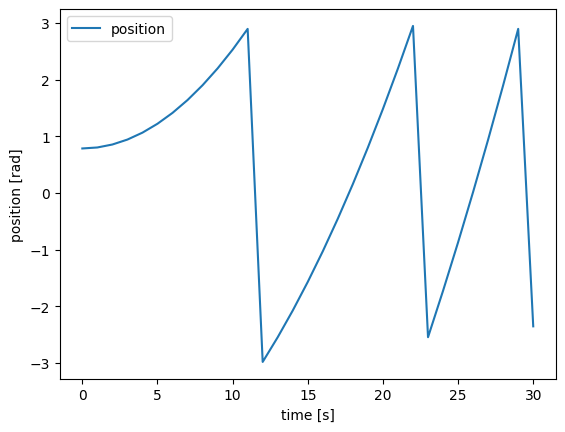

In [54]:
from anglesutils import convert, recenter
from matplotlib.pyplot import plot, xlabel, ylabel

time=linspace(0,30,31)
position=45+1/2*2*time**2
radians=recenter(convert(position))
plot(time, radians, label='position')
xlabel('time [s]')
ylabel('position [rad]')
legend()

## Exercise 1

[4] Define a function `func1(time,amplitude,frequency,phase)` which returns a sine wave (as a function of time) of chosen amplitude, frequency and phase. Test it out with different amplitude, frequency and phase values by plotting suitable graphs. Set the default values for ampliture, frequency and phase to be 1, 1 and 0, respectively.

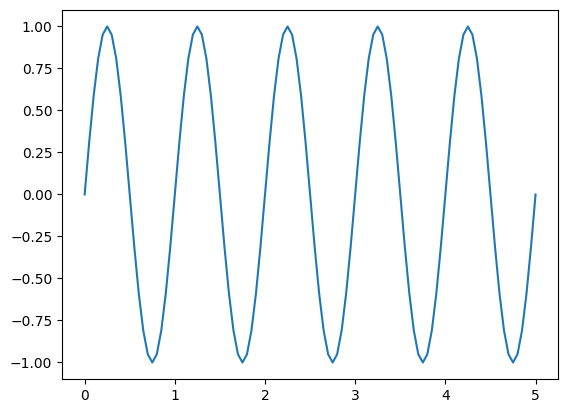

In [72]:
def func1(time, amplitude=1, frequency=1, phase=0):
    'returns a sine wave as a function of time'
    return amplitude*sin(2*pi*frequency*time+phase)
time=linspace(0,5,101)
plot(time, func1(time))

## Exercise 2

A satellite has a circular orbit around the Earth with a period $T$.
  1. [2] Prove that its altitude $h$ above the Earth‘s surface is ($M$ is Earth’s mass and $R$ its radius):
$$h={\left ( \frac{GMT^2}{4\pi^2} \right )}^{1/3} - R$$
    * Write the proof in Markdown in the notebook directly, no need to use python.
    * Follow the [markdown guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) if you need some help with Markdown.
    * Do pay particular attention to the `Equations:` section, and the linked [LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics ) wikibook to make nicely formatted equations. You will need this for the assignments.
  2. [2] Write a function to evaluate $h$.
  3. [2] Write a program that requests user input of $T$ and then prints out the altitude in kilometre
  4. [2] Hence find the altitudes of satellites that orbit the Earth once a day (‘geosynchronous’ orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

Kepler's third law = $\frac{4\pi^2}{GM}r^3 = T^2$  
$r^3=(h+R)^3$  
$\frac{GMT^2}{4\pi^2}=(h+R)^3$  
$(\frac{GMT^2}{4\pi^2})^\frac{1}{3}=h+R$  
$h=(\frac{GMT^2}{4\pi^2})^\frac{1}{3}-R$

In [82]:
def h(T, G=6.6743*10**-11, M=5.9722*10**24, R=6371*10**3):
    'returns altitude in km'
    return ((G*M*T**2)/(4*pi**2))**(1/3)-R
period=input('Input a value for period in seconds:')
print(f'Altitude is {h(float(period))/1000:.3f} km')


Input a value for period in seconds:86400
Altitude is 35870.170 km


## Exercise 3

  1. [4] Write a function `linfit(x,y)` to perform a least squares fit of data using the method described last year in PX1224 week 4 to return estimates of slope and intercept (and their errors).
  2. [2] Put your functions into your own package, using a suitable file name. Type the code you want to be in the package (including comments!) in a cell of the notebook, pick a name for the file and add `%%writefile <file_name>.py` at the top of the cell to have the notebook create the file.
  3. [2] Test out your package by importing it, defining some test data and plotting a graph of the data and fitted straight line. (Label the axes and give the graph a title.)

**IMPORTANT**: The `linfit` function itself must be self contained. It must only take in the x- and y-data, and return m, dm, c and dc. It must not do anything else, such as print or plot data - that should all be done outside the function.